<a href="https://colab.research.google.com/github/minaraaz/MachineLearningCourse/blob/master/HW3/HW3_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1 solution

This Colab Notebook is the solution of the problem 1. In this notebook I have used VGG19 pretrained network on imagenet to train the cats and dog dataset.

In [0]:
import os
from keras import layers
from keras import models
from keras import optimizers
from keras.applications.vgg19 import VGG19
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout
import matplotlib.pyplot as plt

Using TensorFlow backend.


# Preprocessing Dataset

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2019-04-16 18:38:42--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.200.128, 2607:f8b0:4001:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   150MB/s    in 0.4s    

2019-04-16 18:38:43 (150 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Creating CNN using VGG19

Here we load VGG19 pretrained model and freeze it and then train our classifer.

In [0]:
# Convnet
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=20, class_mode='binary')
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(224, 224), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# compile model
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=3e-5), metrics=['acc'])

# train
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=50, validation_data=validation_generator, validation_steps=50)

Epoch 1/50
100/100 [==============================] - 35s 355ms/step - loss: 0.5905 - acc: 0.6750 - val_loss: 0.4273 - val_acc: 0.7970
Epoch 2/50
100/100 [==============================] - 32s 318ms/step - loss: 0.5662 - acc: 0.7080 - val_loss: 0.4257 - val_acc: 0.8080
Epoch 3/50
100/100 [==============================] - 32s 318ms/step - loss: 0.5505 - acc: 0.7130 - val_loss: 0.3698 - val_acc: 0.8350
Epoch 4/50
100/100 [==============================] - 33s 331ms/step - loss: 0.5199 - acc: 0.7305 - val_loss: 0.3749 - val_acc: 0.8150
Epoch 5/50
100/100 [==============================] - 32s 318ms/step - loss: 0.5280 - acc: 0.7315 - val_loss: 0.3504 - val_acc: 0.8420
Epoch 6/50
100/100 [==============================] - 32s 321ms/step - loss: 0.5198 - acc: 0.7375 - val_loss: 0.3871 - val_acc: 0.8120
Epoch 7/50
100/100 [==============================] - 32s 322ms/step - loss: 0.4999 - acc: 0.7610 - val_loss: 0.3682 - val_acc: 0.8250
Epoch 8/50
100/100 [==============================] - 3

# Visualization

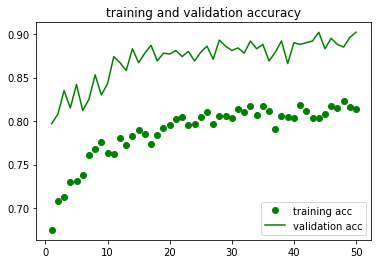

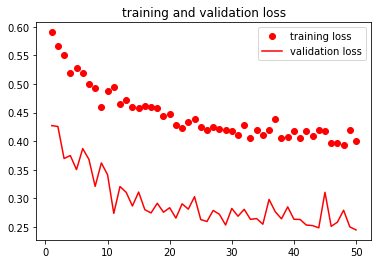

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# training and validation accuracy

plt.plot(epochs, acc, 'go', label='training acc')
plt.plot(epochs, val_acc, 'g', label='validation acc')
plt.title('training and validation accuracy')
plt.legend()

plt.figure()

# training and validation loss

plt.plot(epochs, loss, 'ro', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('training and validation loss')
plt.legend()

plt.show()

# Evaluating the model

In [0]:
val_loss, val_acc = model.evaluate_generator(validation_generator, steps=50)
print("Validation loss:", val_loss)
print("Validation accuracy:", val_acc)

('Validation loss:', 0.2587303864583373)
('Validation accuracy:', 0.8919999969005584)
